## Questions to the customer

1. According to the conditions of the business task, it is necessary to determine the temperature as a target, but in the description of the stages of steel processing it is written that the cycles are repeated so that not only the temperature matches, but also the chemical composition. Is there a discrepancy here or can the chemical composition be neglected?
2. Are there recommendations for quality metrics? Well, according to their borders.
3. Are there any other special requests from the customer, besides the accuracy of the model? (How could it be without it)
4. It begs me to group the data by batches so that there is a total power per batch and the number of cycles (although there are suspicions that the number of cycles will no longer be needed in the future). Am I moving in the right direction?
5. Are the data on the supply of bulk materials mandatory input data according to the customer? There are a lot of gaps in them, if the data is needed, then do I understand correctly that if there are gaps, this means that this bulk material was not supplied and I can set 0?
6. Can the Customer provide information on the calculation of power consumption? Perhaps there is some formula that contains calculations based on the received initial data?

# Industry

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
  <ul class="toc-item">
    <li>
      <span>
        <a href="#Statement-of-the-problem" data-toc-modified-id="Statement-of-the-problem-1">
          <span class="toc-item-num">1&nbsp;&nbsp;</span>Statement of the problem
        </a>
      </span>
    </li>
    <li>
      <span>
        <a href="#Research-and-preparation-of-data" data-toc-modified-id="Research-and-preparation-of-data-1">
          <span class="toc-item-num">2&nbsp;&nbsp;</span>Research and preparation of data
        </a>
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <a href="#Data-exploration-and-preprocessing" data-toc-modified-id="Data-exploration-and-preprocessing-2.1">
              <span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data exploration and preprocessing
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Data-aggregation" data-toc-modified-id="Data-aggregation-2.2">
              <span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data aggregation
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Correlation" data-toc-modified-id="Correlation-2.3">
              <span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation
            </a>
          </span>
        </li>
      </ul>
    </li>
    <li>
      <span>
        <a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3">
          <span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis
        </a>
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <a href="#Preparing-data-for-model-training" data-toc-modified-id="Preparing-data-for-model-training-3.1">
              <span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing data for model training
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Model-training" data-toc-modified-id="Model-training-3.2">
              <span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model training
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Determination-of-the-best-model" data-toc-modified-id="Determination-of-the-best-model-3.3">
              <span class="toc-item-num">3.3&nbsp;&nbsp;</span>Determination of the best model
            </a>
          </span>
        </li>
      </ul>
    </li>
    <li>
      <span>
        <a href="#model" data-toc-modified-id="model-4">
          <span class="toc-item-num">4&nbsp;&nbsp;</span>model
        </a>
      </span>
      <ul class="toc-item">
        <li>
          <span>
            <a href="#Checking-the-best-model-on-test-data" data-toc-modified-id="Checking-the-best-model-on-test-data-4.1">
              <span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking the best model on test data
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Identification-of-important-features" data-toc-modified-id="Identification-of-important-features-4.2">
              <span class="toc-item-num">4.2&nbsp;&nbsp;</span>Identification of important features
            </a>
          </span>
        </li>
        <li>
          <span>
            <a href="#Making-business-recommendations" data-toc-modified-id="Making-business-recommendations-4.3">
              <span class="toc-item-num">4.3&nbsp;&nbsp;</span>Making business recommendations
            </a>
          </span>
        </li>
      </ul>
    </li>
  </ul>
</div>


## Statement of the problem

In order to optimize production costs, the metallurgical plant Tak Temper Steel LLC decided to reduce electricity consumption at the stage of steel processing. You have to build a model that predicts the temperature of the steel.

### Description of the processing step

Steel is processed in a metal ladle with a capacity of about 100 tons. In order for the ladle to withstand high temperatures, it is lined with refractory bricks from the inside. Molten steel is poured into a ladle and heated to the desired temperature with graphite electrodes. They are installed in the lid of the bucket.

Sulfur is removed from the alloy (desulfurization), the chemical composition is corrected by adding impurities, and samples are taken. Steel is alloyed - its composition is changed - by feeding pieces of alloy from a bunker for bulk materials or wire through a special tribe apparatus.

Before introducing alloying additives for the first time, the temperature of the steel is measured and its chemical analysis is carried out. Then the temperature is raised for several minutes, alloying materials are added and the alloy is purged with an inert gas. Then it is stirred and measured again. This cycle is repeated until the target chemical composition and optimum melting temperature are reached.

Then the molten steel is sent to finish the metal or enters the continuous casting machine. From there, the finished product comes out in the form of slab blanks.

## Research and preparation of data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import kstest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import time
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Data exploration and preprocessing

The data consists of files obtained from different sources:

- `data_arc_new.csv` - data about electrodes;
- `data_bulk_new.csv` - data on the supply of bulk materials (volume);
- `data_bulk_time_new.csv` *—* data on the supply of bulk materials (time);
- `data_gas_new.csv` — data on alloy gas purge;
- `data_temp_new.csv` - temperature measurement results;
- `data_wire_new.csv` - data on wire materials (volume);
- `data_wire_time_new.csv` - data on wire materials (time).

In all files, the `key` column contains the batch number. There can be several lines in files with the same `key` value: they correspond to different processing iterations.

### Table df_arc

In [2]:
#electrode data
try:
    df_arc = pd.read_csv('datasets/13_data_arc_new.csv', parse_dates=['Начало нагрева дугой', 'Конец нагрева дугой'])
except FileNotFoundError:
    df_arc = pd.read_csv('ya/Итоговый проект/data_arc_new.csv', parse_dates=['Начало нагрева дугой', 'Конец нагрева дугой'])

df_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


In [3]:
df_arc.tail()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
14875,3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347


The table contains five columns.
- key contains the batch number
- Start of arc heating
- End of arc heating
- Active power
- Reactive power

In [4]:
# Description function
def describe_colums(df):
    
     values = pd.DataFrame()
    
     for col in df.columns:
         values[col] = [df_arc[col].unique(), df_arc[col].dtypes, df_arc[col].nunique(), df_arc[col].isnull().sum().sum(),
                        df_arc.duplicated().sum()]
        
     return values.transpose().sort_values(by=1, ascending=False).rename(
         {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_arc)

,Values,Data type,Unique values,Missing,Duplicates
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,3214,0,0
Начало нагрева дугой,"[2019-05-03T11:02:14.000000000, 2019-05-03T11:...",datetime64[ns],14876,0,0
Конец нагрева дугой,"[2019-05-03T11:06:02.000000000, 2019-05-03T11:...",datetime64[ns],14876,0,0
Активная мощность,"[0.30513, 0.765658, 0.580313, 0.518496, 0.8671...",float64,13846,0,0
Реактивная мощность,"[0.211253, 0.477438, 0.43046, 0.379979, 0.6436...",float64,14707,0,0


In [5]:
df_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [6]:
grouped = df_arc.groupby('key').agg({'Начало нагрева дугой': 'first', 'Конец нагрева дугой': 'last', 'Активная мощность': 'sum', 'Реактивная мощность': 'sum'})
grouped['Количество циклов'] = df_arc.groupby('key').size()
grouped.sort_values('Реактивная мощность', ascending=False)

,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Количество циклов
key,,,,,
1689,2019-07-05 08:07:21,2019-07-05 14:38:46,12.375636,8.949049,15
1513,2019-06-29 05:41:30,2019-06-29 08:54:03,11.632350,8.572990,15
2108,2019-07-27 10:41:13,2019-07-27 16:33:58,10.706804,7.589489,16
46,2019-05-05 03:52:56,2019-05-05 07:16:34,9.180259,7.051945,13
322,2019-05-15 21:12:28,2019-05-15 23:03:35,8.914806,6.564143,13
...,...,...,...,...,...
343,2019-05-16 17:02:54,2019-05-16 17:05:42,0.303670,0.239620,1
1281,2019-06-20 19:26:26,2019-06-20 19:28:38,0.356664,0.236002,1
2738,2019-08-19 13:45:28,2019-08-19 13:47:36,0.279524,0.221883,1


In [7]:
df_arc[df_arc['Реактивная мощность'] < 0][['key', 'Начало нагрева дугой', 'Конец нагрева дугой', 'Активная мощность', 'Реактивная мощность']]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [8]:
#fill in the identified outlier by the average value of rows with similar

# Select rows according to the given condition
selected_rows = df_arc[(df_arc['Активная мощность'] > 0.705) & (df_arc['Активная мощность'] < 0.706) & (df_arc['key'] != 2116)]

# Calculate the average value in the 'Active power' column for the selected rows
mean_active_power = selected_rows['Реактивная мощность'].mean()

# Replace the value in the 'Active power' column with the average value
df_arc.loc[df_arc['Реактивная мощность'] < 0, ['Реактивная мощность']] = mean_active_power

# Output the result
df_arc[df_arc['key'] == 2116][['key', 'Начало нагрева дугой', 'Конец нагрева дугой', 'Активная мощность', 'Реактивная мощность']]


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,0.513887
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


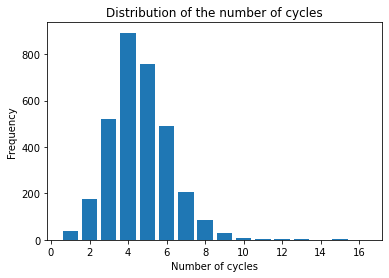

In [9]:
grouped_by_cycles = grouped.groupby('Количество циклов').size().reset_index(name='Частота')
plt.bar(grouped_by_cycles['Количество циклов'], grouped_by_cycles['Частота'])
plt.xlabel('Number of cycles')
plt.ylabel('Frequency')
plt.title('Distribution of the number of cycles')
plt.show()

Most often there are several cycles at this stage of the technological process, the most common number of cycles is 3-6.

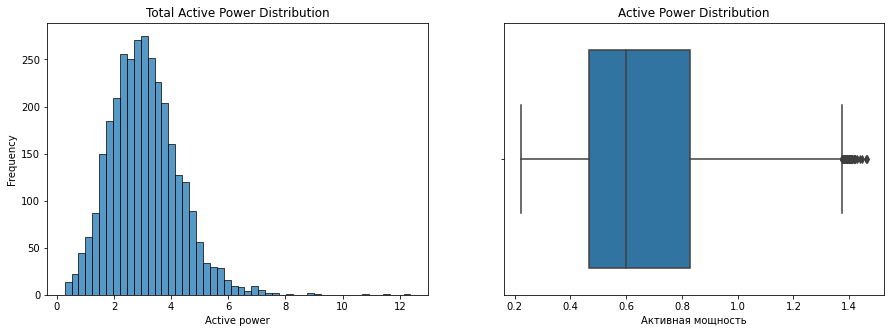

In [10]:
# Create a shared Figure and Axes object
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# graph 1
sns.histplot(ax=axs[0], data=grouped, x='Активная мощность', bins=50)
axs[0].set_title('Total Active Power Distribution')
axs[0].set_xlabel('Active power')
axs[0].set_ylabel('Frequency')

# graph 2
sns.boxplot(ax=axs[1], data=df_arc, x='Активная мощность')
axs[1].set_title('Active Power Distribution')

# Display graphs
plt.show()

- There are no gaps and duplicates in the table, which is good.
- The number of unique key values is significantly less than strings. This means that several cycles in technology are allowed.
- The columns have different styles of names, but we will change them already in the combined table.
- The start and end of the arc heating have already been converted into a date format.

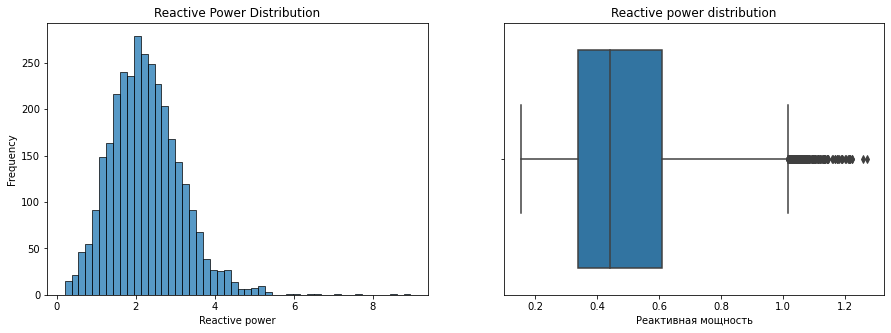

In [11]:
# Создание общего объекта Figure и Axes
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# График 1
sns.histplot(ax=axs[0], data=grouped[grouped['Реактивная мощность'] > 0], x='Реактивная мощность', bins=50)
axs[0].set_title('Reactive Power Distribution')
axs[0].set_xlabel('Reactive power')
axs[0].set_ylabel('Frequency')
# График 2
sns.boxplot(ax=axs[1], data=df_arc, x='Реактивная мощность')
axs[1].set_title('Reactive power distribution')

# Отображение графиков
plt.show()

Графики выглядят нормальными с небольшими хвостами вправо. Ящики с усами показывают выбросы, от которых можно избавиться.

In [12]:
count = (df_arc['Реактивная мощность'] > 1.1).sum()
print('Number of outliers in column Reactive power:', count)
count = (df_arc['Активная мощность'] > 1.37).sum()
print('Number of outliers in column Active power:', count)

Number of outliers in column Reactive power: 55
Number of outliers in column Active power: 75


In [13]:
df_arc.loc[df_arc['Реактивная мощность'] > 1.1].head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
171,38,2019-05-04 17:18:40,2019-05-04 17:21:07,1.336674,1.213404
681,147,2019-05-09 05:38:07,2019-05-09 05:40:09,1.356187,1.100693
715,154,2019-05-09 13:09:17,2019-05-09 13:12:23,1.385760,1.102745
1752,378,2019-05-18 04:02:47,2019-05-18 04:07:06,1.222224,1.142268
2430,524,2019-05-23 11:06:23,2019-05-23 11:09:30,1.296125,1.125178
2591,564,2019-05-24 23:02:49,2019-05-24 23:05:31,1.410455,1.270284
2674,582,2019-05-25 12:35:49,2019-05-25 12:37:18,1.421234,1.158825
2740,595,2019-05-26 01:04:21,2019-05-26 01:06:21,1.290193,1.111593
2768,601,2019-05-26 06:08:03,2019-05-26 06:12:53,1.386709,1.198990
2891,630,2019-05-27 13:06:54,2019-05-27 13:10:30,1.239881,1.132839


In [14]:
df_arc.loc[df_arc['Активная мощность'] > 1.37].head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
542,118,2019-05-08 01:44:53,2019-05-08 01:46:39,1.406450,0.855752
684,147,2019-05-09 06:05:20,2019-05-09 06:08:54,1.394768,0.918751
715,154,2019-05-09 13:09:17,2019-05-09 13:12:23,1.385760,1.102745
775,165,2019-05-09 23:00:14,2019-05-09 23:03:11,1.397799,1.081590
951,204,2019-05-11 08:16:29,2019-05-11 08:18:32,1.406975,0.936539
1054,228,2019-05-12 07:32:37,2019-05-12 07:35:21,1.419545,0.991214
1102,237,2019-05-12 16:05:44,2019-05-12 16:09:46,1.391735,0.899492
1358,296,2019-05-14 22:07:03,2019-05-14 22:09:22,1.390770,1.091180
1403,304,2019-05-15 05:24:44,2019-05-15 05:29:16,1.378677,0.848657
1467,317,2019-05-15 16:16:41,2019-05-15 16:18:18,1.381234,0.963517


The number of outliers is insignificant, less than 1% of the sample, and their values look adequate. They can be left unchanged.

In [15]:
#calculation of total time
# Calculate cycle time
df_arc['Продолжительность'] = (df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']).dt.total_seconds()
# Display the first 5 rows of the table with the cycle duration column added
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Продолжительность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


Now it is possible to calculate the total power consumption (Общая мощность):

$$ S = \sqrt{P^2 + Q^2} * t$$

Where:
- P - Active power,
- Q - Reactive power,
- t - Duration

In [16]:
df_arc['Общая мощность'] = np.sqrt(df_arc['Активная мощность']**2 + df_arc['Реактивная мощность']**2) * df_arc['Продолжительность']
df_arc.sort_values(by='Общая мощность', ascending=False)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Продолжительность,Общая мощность
13760,2985,2019-08-28 21:57:30,2019-08-28 22:08:37,1.346628,0.911802,667.0,1084.729420
7799,1689,2019-07-05 11:30:50,2019-07-05 11:45:57,0.966775,0.675200,907.0,1069.548361
12424,2701,2019-08-18 00:40:31,2019-08-18 00:54:17,1.027288,0.769083,826.0,1059.989839
2027,437,2019-05-20 02:40:51,2019-05-20 02:52:03,1.317476,0.856872,672.0,1056.125051
9182,1992,2019-07-23 02:35:50,2019-07-23 02:45:08,1.337070,1.000844,558.0,931.951029
...,...,...,...,...,...,...,...
4063,873,2019-06-06 12:25:13,2019-06-06 12:25:24,0.527412,0.384561,11.0,7.179981
7372,1601,2019-07-02 13:07:56,2019-07-02 13:08:07,0.510212,0.385029,11.0,7.031088
10210,2213,2019-07-31 06:30:24,2019-07-31 06:30:39,0.349767,0.256018,15.0,6.501807
508,110,2019-05-07 11:58:29,2019-05-07 11:58:47,0.293605,0.207924,18.0,6.475906


In [17]:
# Now group the data by key
grouped_arc = df_arc.groupby('key').agg({'Общая мощность': 'sum'})
grouped_arc

,Общая мощность
key,
1,770.282114
2,481.760005
3,722.837668
4,683.455597
5,512.169934
...,...
3237,630.503534
3238,286.052252
3239,941.538764


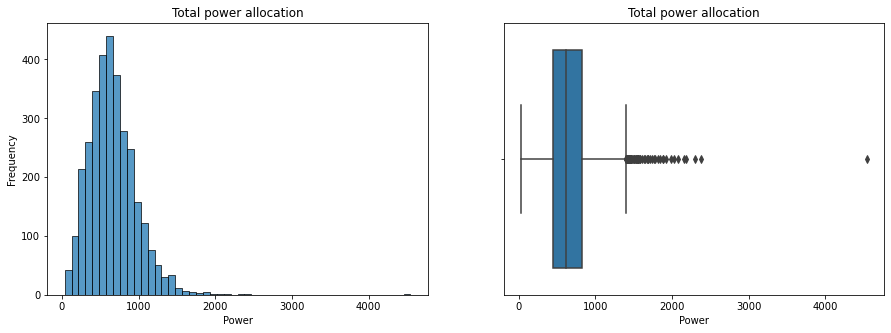

In [18]:
# Create a shared Figure and Axes object
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Graph 1
sns.histplot(ax=axs[0], data=grouped_arc, x='Общая мощность', bins=50)
axs[0].set_title('Total power allocation')
axs[0].set_xlabel('Power')
axs[0].set_ylabel('Frequency')

# Graph 2
sns.boxplot(ax=axs[1], data=grouped_arc, x='Общая мощность')
axs[1].set_title('Total power allocation')
axs[1].set_xlabel('Power')

# Graphs display
plt.show()

In [19]:
count = (grouped_arc['Общая мощность'] > 1500).sum()
print('Number of outliers in column Total power allocation:', count)

Number of outliers in column Total power allocation: 36


In [20]:
grouped_arc.sort_values(by='Общая мощность', ascending=False)

,Общая мощность
key,
1689,4546.405812
1513,2380.879281
46,2306.073920
437,2181.937459
2108,2151.752807
...,...
1773,50.454545
2738,45.681070
2112,41.487172


In [21]:
grouped_arc.describe()

,Общая мощность
count,3214.000000
mean,655.598704
std,308.944411
min,33.430208
25%,444.626580
50%,620.101427
75%,827.671845
max,4546.405812


At the output, we have only two key columns and the total power, the outliers are about 1%, while the spread of values is pretty smooth, except for key = 1689. This is a clear anomaly. It can be removed. Also, for the final table, it is better to bring the column names to the standard format. In general, according to the final table, the distribution can be considered close to normal.

In [22]:
fin_arc = grouped_arc.rename(columns={'Общая мощность': 'total_power'})

In [23]:
fin_arc = fin_arc.drop(fin_arc[fin_arc['total_power'] > 3000].index)
fin_arc.sort_values(by='total_power', ascending=False)

,total_power
key,
1513,2380.879281
46,2306.073920
437,2181.937459
2108,2151.752807
460,2074.472552
...,...
1773,50.454545
2738,45.681070
2112,41.487172


In [24]:
fin_arc.describe()

,total_power
count,3213.000000
mean,654.387746
std,301.267038
min,33.430208
25%,444.547272
50%,620.091715
75%,827.333536
max,2380.879281


### Table df_bulk

In [25]:
try:
    df_bulk = pd.read_csv('datasets/13_data_bulk_new.csv')
except FileNotFoundError:
    df_bulk = pd.read_csv('ya/Итоговый проект/data_bulk_new.csv')

df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [26]:
# bring the column names to the correct format
df_bulk.columns = ['key', 'bulk_1','bulk_2','bulk_3','bulk_4','bulk_5','bulk_6','bulk_7','bulk_8',
                     'bulk_9','bulk_10','bulk_11','bulk_12','bulk_13','bulk_14','bulk_15']

In [27]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_bulk[col].unique(), df_bulk[col].dtypes, df_bulk[col].nunique(), df_bulk[col].isnull().sum().sum(), 
                       df_bulk.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_bulk)

,Values,Data type,Unique values,Missing,Duplicates
bulk_1,"[nan, 46.0, 27.0, 48.0, 29.0, 78.0, 52.0, 69.0...",float64,47,2877,0
bulk_2,"[nan, 228.0, 247.0, 232.0, 325.0, 257.0, 233.0...",float64,15,3107,0
bulk_3,"[nan, 71.0, 151.0, 63.0, 89.0, 132.0, 67.0, 19...",float64,278,1831,0
bulk_4,"[43.0, 73.0, 34.0, 81.0, 78.0, 117.0, 99.0, na...",float64,206,2115,0
bulk_5,"[nan, 72.0, 79.0, 112.0, 83.0, 86.0, 74.0, 189...",float64,55,3052,0
bulk_6,"[nan, 72.0, 77.0, 76.0, 219.0, 108.0, 88.0, 84...",float64,205,2553,0
bulk_7,"[nan, 178.0, 406.0, 75.0, 155.0, 252.0, 47.0, ...",float64,25,3104,0
bulk_8,"[nan, 49.0]",float64,1,3128,0
bulk_9,"[nan, 63.0, 68.0, 65.0, 71.0, 66.0, 70.0, 147....",float64,10,3110,0
bulk_10,"[nan, 56.0, 106.0, 105.0, 96.0, 57.0, 36.0, 54...",float64,77,2953,0


In [28]:
df_bulk.describe()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


There are many gaps in this table, it is striking that in some columns only a few row values are filled. It is assumed that if the data is not filled, then these materials were not added and they can be filled with zero values.

In [29]:
df_bulk = df_bulk.fillna(0)

In [30]:
df_bulk = df_bulk.astype(int)

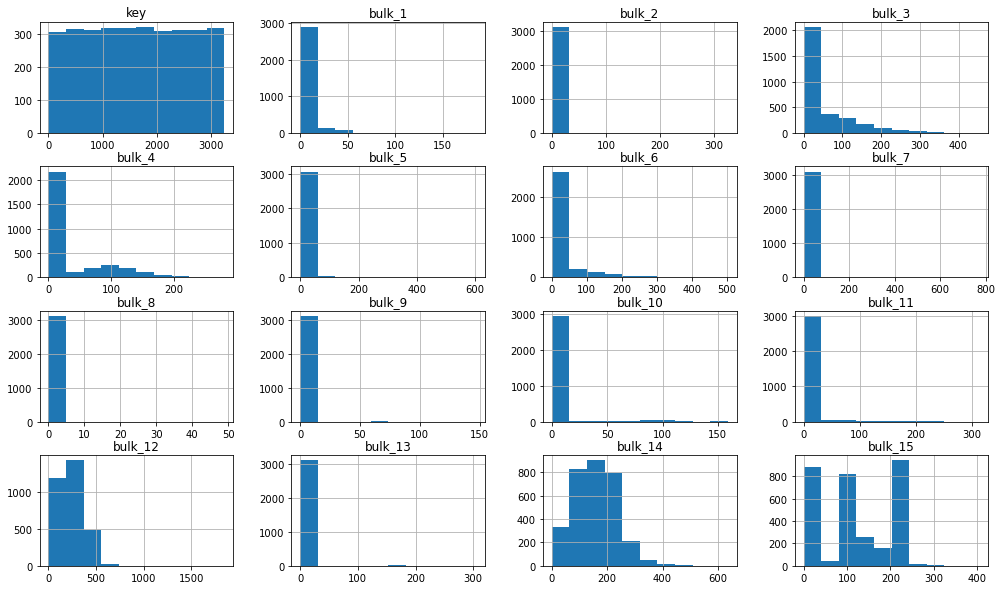

In [31]:
df_bulk.hist(figsize=(17, 10));

The data is far from a normal distribution, but the filled values are not enough for a more detailed analysis.
Fifteen parameters is a lot, the model will be hard to train and there is a high probability of decreasing its accuracy.
Let's leave as separate bulk columns in which gaps are less than 1000, the rest will be combined into one called bulk_other.
Since the materials can be in different units of measurement and in incomparable volumes, we will translate the table into a Boolean value, either the material is supplied or not.

In [32]:
# create a new table
fin_bulk = df_bulk[['key']].copy()  # copy the key column to the new table
# create a list of columns where the value 0 occurs less than 2200 times
cols_to_keep = [col for col in df_bulk.columns[1:] if df_bulk[col].value_counts()[0] < 2200]

# add the columns to be saved to the new table
for col in cols_to_keep:
    fin_bulk[col] = df_bulk[col].apply(lambda x: 1 if x > 0 else 0)

# concatenate remaining columns in bulk_others
other_cols = [col for col in df_bulk.columns[1:] if col not in cols_to_keep]
fin_bulk['bulk_others'] = df_bulk[other_cols].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)

fin_bulk

,key,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_others
0,1,0,1,1,1,1,0
1,2,0,1,1,1,1,0
2,3,0,1,1,1,1,0
3,4,0,1,1,1,1,0
4,5,0,1,1,1,1,0
...,...,...,...,...,...,...,...
3124,3237,1,0,1,1,1,0
3125,3238,1,0,1,1,1,0
3126,3239,0,0,1,1,1,1
3127,3240,0,0,0,1,1,1


### Table_df_wire

In [33]:
#wire material data (volume)
try:
    df_wire = pd.read_csv('datasets/13_data_wire_new.csv')
except FileNotFoundError:
    df_wire = pd.read_csv('ya/Итоговый проект/data_wire_new.csv')
    
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# bring the column names to the correct format
df_wire.columns = ['key', 'wire_1','wire_2','wire_3','wire_4','wire_5','wire_6','wire_7','wire_8', 'wire_9']

In [35]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_wire[col].unique(), df_wire[col].dtypes, 
                       df_wire[col].nunique(), df_wire[col].isnull().sum().sum(), 
                       df_wire.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_wire)

,Values,Data type,Unique values,Missing,Duplicates
wire_1,"[60.059998, 96.052315, 91.160157, 89.063515, 8...",float64,2251,26,0
wire_2,"[nan, 9.11456, 9.143681, 12.376, 52.416003, 37...",float64,713,2002,0
wire_3,"[nan, 250.041794, 276.324066, 96.047951, 88.64...",float64,56,3018,0
wire_4,"[nan, 24.148801, 43.065361, 33.182243, 103.034...",float64,14,3067,0
wire_5,"[nan, 15.132]",float64,1,3080,0
wire_6,"[nan, 60.094322000000005, 54.122643, 64.212723...",float64,69,3008,0
wire_7,"[nan, 5.035472, 8.49004, 1.053936, 0.234208, 1...",float64,10,3070,0
wire_8,"[nan, 46.002319, 46.094879, 46.187439000000005...",float64,13,3062,0
wire_9,"[nan, 35.0532, 4.622800000000001, 35.0168, 10....",float64,25,3052,0
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,3081,0,0


In [36]:
df_wire.describe()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Unlike bulk, the data in the wire table is closer to each other in terms of values, there are also a lot of gaps, only wire_1 is almost completely filled and wire_2 is one third full. The remaining columns can be combined into one wire_others

In [37]:
df_wire = df_wire.fillna(0)

In [38]:
# select desired columns
fin_wire = df_wire[["key", "wire_1", "wire_2"]].copy()

# create a new column "wire_others" and fill it with the sum of the values of other columns
fin_wire["wire_others"] = df_wire.loc[:, "wire_3":"wire_9"].sum(axis=1)

fin_wire.head()

,key,wire_1,wire_2,wire_others
0,1,60.059998,0.00000,0.0
1,2,96.052315,0.00000,0.0
2,3,91.160157,0.00000,0.0
3,4,89.063515,0.00000,0.0
4,5,89.238236,9.11456,0.0


### Tables df_bulk_time and df_wire_time

In [39]:
#данные о подаче сыпучих материалов (время)
try:
    df_bulk_time = pd.read_csv('datasets/13_data_bulk_time_new.csv')
except FileNotFoundError:
    df_bulk_time = pd.read_csv('ya/Итоговый проект/data_bulk_time_new.csv')

df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [40]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_bulk_time[col].unique(), df_bulk_time[col].dtypes, 
                       df_bulk_time[col].nunique(), df_bulk_time[col].isnull().sum().sum(), 
                       df_bulk_time.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_bulk_time)

,Values,Data type,Unique values,Missing,Duplicates
Bulk 1,"[nan, 2019-05-03 17:42:46, 2019-05-05 16:26:52...",object,252,2877,0
Bulk 2,"[nan, 2019-05-07 15:39:35, 2019-05-07 16:16:34...",object,22,3107,0
Bulk 3,"[nan, 2019-05-03 20:40:25, 2019-05-04 04:25:29...",object,1298,1831,0
Bulk 4,"[2019-05-03 11:28:48, 2019-05-03 11:36:50, 201...",object,1014,2115,0
Bulk 5,"[nan, 2019-05-07 15:19:17, 2019-05-07 16:46:56...",object,77,3052,0
Bulk 6,"[nan, 2019-05-03 19:09:15, 2019-05-03 21:36:10...",object,576,2553,0
Bulk 7,"[nan, 2019-05-07 18:11:01, 2019-05-15 22:42:51...",object,25,3104,0
Bulk 8,"[nan, 2019-07-08 17:14:53]",object,1,3128,0
Bulk 9,"[nan, 2019-05-14 11:57:58, 2019-05-14 12:35:40...",object,19,3110,0
Bulk 10,"[nan, 2019-05-06 07:54:02, 2019-05-07 01:15:07...",object,176,2953,0


In [41]:
#wire material data (time)
try:
    df_wire_time = pd.read_csv('datasets/13_data_wire_time_new.csv')
except FileNotFoundError:
    df_wire_time = pd.read_csv('ya/Итоговый проект/data_wire_time_new.csv')
    
df_wire_time.head(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_wire_time[col].unique(), df_wire_time[col].dtypes, 
                       df_wire_time[col].nunique(), df_wire_time[col].isnull().sum().sum(), 
                       df_wire_time.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
{0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_wire_time)

,Values,Data type,Unique values,Missing,Duplicates
Wire 1,"[2019-05-03 11:06:19, 2019-05-03 11:36:50, 201...",object,3055,26,0
Wire 2,"[nan, 2019-05-03 13:15:34, 2019-05-03 13:48:52...",object,1079,2002,0
Wire 3,"[nan, 2019-05-04 04:34:27, 2019-05-04 05:41:29...",object,63,3018,0
Wire 4,"[nan, 2019-05-07 15:19:17, 2019-05-07 16:46:56...",object,14,3067,0
Wire 5,"[nan, 2019-08-13 06:14:30]",object,1,3080,0
Wire 6,"[nan, 2019-05-07 14:46:05, 2019-05-07 16:16:34...",object,73,3008,0
Wire 7,"[nan, 2019-07-27 05:49:05, 2019-07-27 07:56:34...",object,11,3070,0
Wire 8,"[nan, 2019-05-14 11:29:24, 2019-05-14 12:18:01...",object,19,3062,0
Wire 9,"[nan, 2019-05-04 17:21:27, 2019-06-02 15:42:11...",object,29,3052,0
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,3081,0,0


We do not need the data of the table, since we have combined uninformative columns, time most likely does not affect the overall picture.

### Table df_gas

In [43]:
#data on alloy gas purge
try:
    df_gas = pd.read_csv('datasets/13_data_gas_new.csv')
except FileNotFoundError:
    df_gas = pd.read_csv('ya/Итоговый проект/data_gas_new.csv')
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [44]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_gas[col].unique(), df_gas[col].dtypes, 
                       df_gas[col].nunique(), df_gas[col].isnull().sum().sum(), 
                       df_gas.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_gas)

,Values,Data type,Unique values,Missing,Duplicates
Газ 1,"[29.7499859302, 12.5555609779, 28.5547926192, ...",float64,3239,0,0
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,3239,0,0


In [45]:
# bring the column names to the correct format
df_gas.columns = ['key', 'gas']

In [46]:
df_gas.describe()

,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


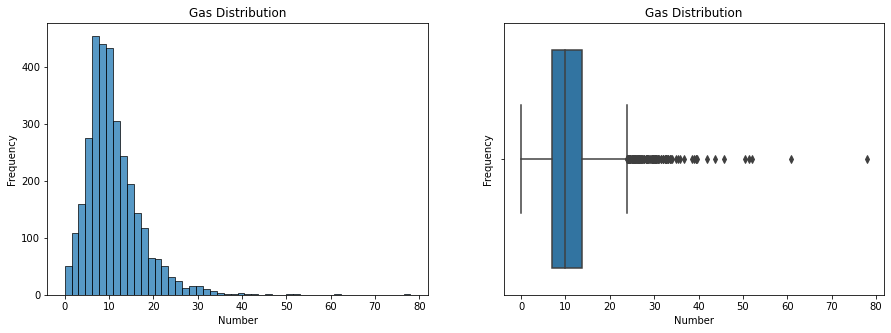

In [47]:
# Create a shared Figure and Axes object
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Graph 1
sns.histplot(ax=axs[0], data=df_gas, x='gas', bins=50)
axs[0].set_title('Gas Distribution')
axs[0].set_xlabel('Number')
axs[0].set_ylabel('Frequency')

# Graph 2
sns.boxplot(ax=axs[1], data=df_gas, x='gas')
axs[1].set_title('Gas Distribution')
axs[1].set_xlabel('Number')
axs[1].set_ylabel('Frequency')

# Display graphs
plt.show()

In [48]:
count = (df_gas['gas'] > 25).sum()
print('Number of outliers in the Gas column:', count)

Number of outliers in the Gas column: 101


In [49]:
df_gas.sort_values(by='gas', ascending=False).head(10)

,key,gas
319,322,77.995040
277,280,60.935689
2107,2110,52.142373
2567,2570,51.380229
116,117,50.581035
2105,2108,45.638999
1461,1464,43.655411
660,663,41.854643
525,528,39.728826
610,613,39.425706


The distribution tends to be normal. Up to 50 with a little there is a soft tail. There are 2 anomalous values. Which is better to remove, we will hold these events on the train

In [50]:
df_gas.describe()

,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [51]:
fin_gas = df_gas

#### 2.1.5 Таблица df_temp

In [52]:
# temperature measurement results
try:
    df_temp = pd.read_csv('datasets/13_data_temp_new.csv')
except FileNotFoundError:
    df_temp = pd.read_csv('ya/Итоговый проект/data_temp_new.csv')
    
df_temp

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


In [53]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df_temp[col].unique(), df_temp[col].dtypes, 
                       df_temp[col].nunique(), df_temp[col].isnull().sum().sum(), 
                       df_temp.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
{0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_temp)

,Values,Data type,Unique values,Missing,Duplicates
Время замера,"[2019-05-03 11:02:04, 2019-05-03 11:07:18, 201...",object,18092,0,0
Температура,"[1571.0, 1604.0, 1618.0, 1601.0, 1606.0, 1613....",float64,172,3427,0
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,3216,0,0


It is necessary to bring the Measurement time to the desired date format.

In [54]:
result = df_temp.groupby('key').agg({
    'Время замера': [('time_start', 'min'), ('time_end', 'max')],
    'Температура': [('temp_start', lambda x: x.iloc[0]), ('temp_end', lambda x: x.iloc[-1])]
})
result

Время замера                      Температура         
               time_start             time_end  temp_start temp_end
key                                                                
1     2019-05-03 11:02:04  2019-05-03 11:30:38      1571.0   1613.0
2     2019-05-03 11:34:04  2019-05-03 11:55:09      1581.0   1602.0
3     2019-05-03 12:06:44  2019-05-03 12:35:57      1596.0   1599.0
4     2019-05-03 12:39:27  2019-05-03 12:59:47      1601.0   1625.0
5     2019-05-03 13:11:03  2019-05-03 13:36:39      1576.0   1602.0
...                   ...                  ...         ...      ...
3237  2019-09-06 11:31:15  2019-09-06 11:55:45      1569.0      NaN
3238  2019-09-06 12:16:15  2019-09-06 12:34:37      1584.0      NaN
3239  2019-09-06 14:16:50  2019-09-06 15:09:55      1598.0      NaN
3240  2019-09-06 15:25:21  2019-09-06 16:35:26      1617.0      NaN
3241  2019-09-06 16:48:55  2019-09-06 17:30:05      1586.0      NaN

[3216 rows x 4 columns]

In [55]:
result.describe()

Температура             
        temp_start     temp_end
count  3216.000000  2477.000000
mean   1588.592040  1595.334275
std      29.137454    16.019339
min    1191.000000  1541.000000
25%    1572.000000  1587.000000
50%    1588.000000  1593.000000
75%    1606.000000  1599.000000
max    1684.000000  1700.000000

In [56]:
fin_temp = result.loc[:, [('Температура', 'temp_start'), ('Температура', 'temp_end')]]
fin_temp.columns = fin_temp.columns.droplevel()
fin_temp

,temp_start,temp_end
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
3237,1569.0,NaN
3238,1584.0,NaN
3239,1598.0,NaN


Outliers in the data should be removed as they are targets

In [57]:
fin_temp = fin_temp.dropna()
fin_temp 

,temp_start,temp_end
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


In [58]:
fin_temp.describe()

,temp_start,temp_end
count,2477.000000,2477.000000
mean,1588.405733,1595.334275
std,29.232904,16.019339
min,1191.000000,1541.000000
25%,1572.000000,1587.000000
50%,1588.000000,1593.000000
75%,1605.000000,1599.000000
max,1679.000000,1700.000000


The average value is close to the 50% percentile of the dataset. The data is normally distributed. But still, you should look at the visualization.

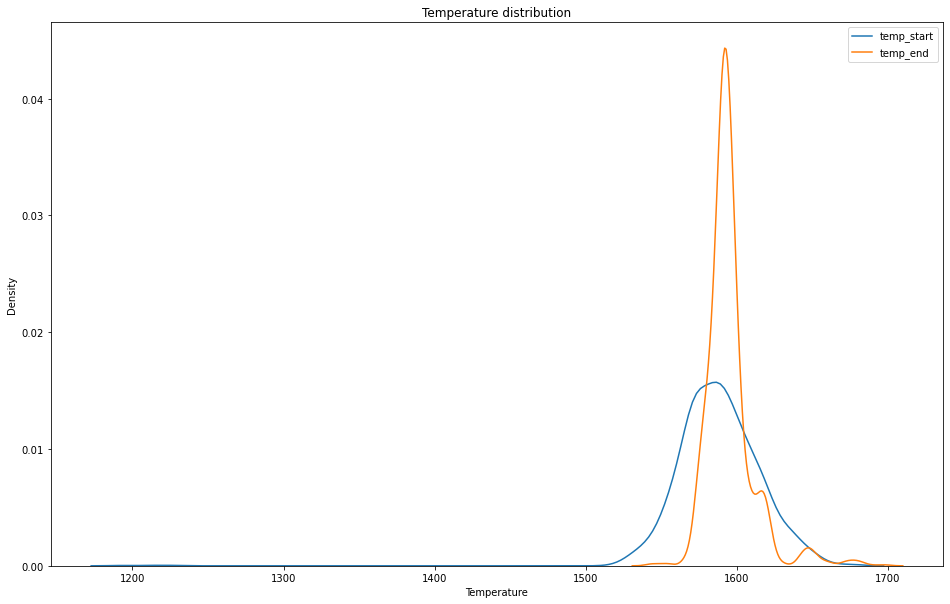

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

sns.kdeplot(data=fin_temp['temp_start'], label='temp_start')
sns.kdeplot(data=fin_temp['temp_end'], label='temp_end')

plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Temperature distribution')

plt.legend()
plt.show()


Temperatures below 1300 will clearly be an anomaly. Let's get rid of these values.

In [60]:
fin_temp = fin_temp.drop(fin_temp[fin_temp['temp_start'] < 1400].index)
fin_temp = fin_temp.drop(fin_temp[fin_temp['temp_end'] < 1400].index)

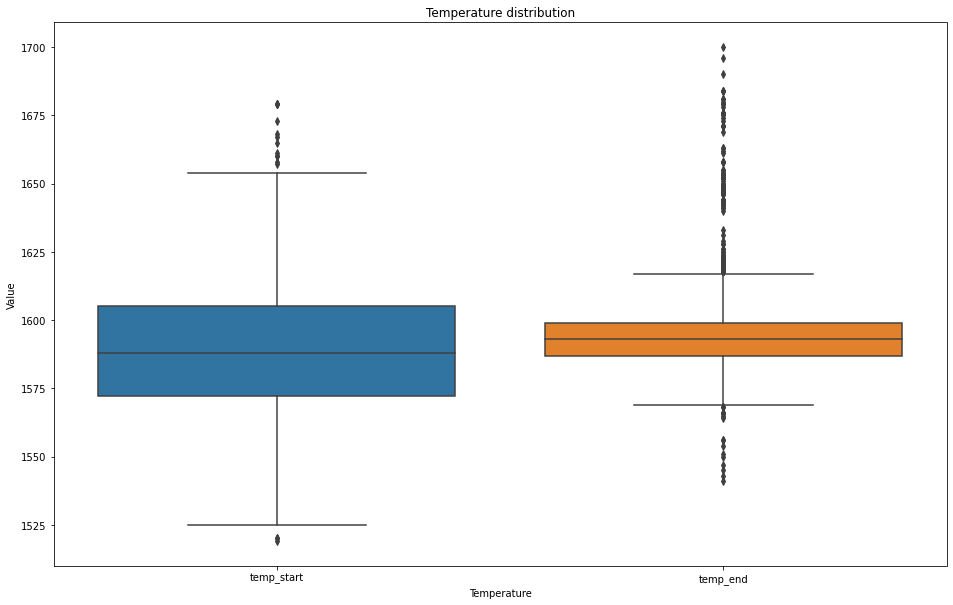

In [61]:
plt.figure(figsize=(16,10))
sns.boxplot(data=fin_temp[['temp_start', 'temp_end']])

plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Temperature distribution')

plt.show()

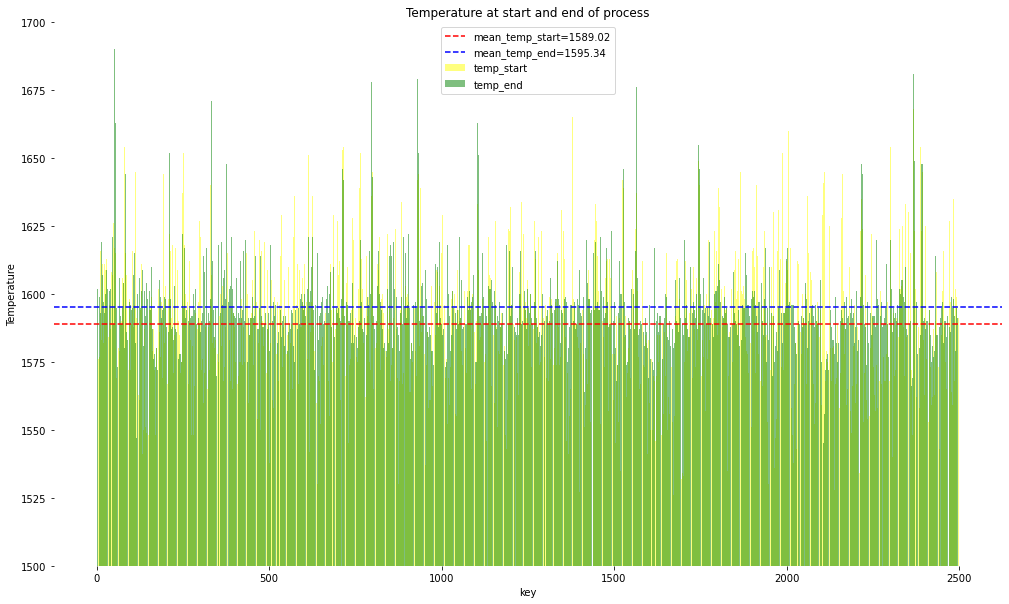

In [62]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.set_ylim(1500, 1700)
# column settings
width = 0.9
alpha = 0.5

# draw columns
ax.bar(fin_temp.index, fin_temp['temp_start'], width=width, color='yellow', alpha=alpha, label='temp_start')
ax.bar(fin_temp.index + width, fin_temp['temp_end'], width=width, color='green', alpha=alpha, label='temp_end')

# add average lines
mean_temp_start = fin_temp['temp_start'].mean()
mean_temp_end = fin_temp['temp_end'].mean()
ax.axhline(mean_temp_start, color='red', linestyle='--', label=f'mean_temp_start={mean_temp_start:.2f}')
ax.axhline(mean_temp_end, color='blue', linestyle='--', label=f'mean_temp_end={mean_temp_end:.2f}')

# add axis labels and legend
ax.set_xlabel('key')
ax.set_ylabel('Temperature')
ax.set_title('Temperature at start and end of process')
ax.legend()

# remove chart frame
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

The graph above reflects that our operating data is a reflection of real conditions, the averages show the optimal values, and the spreads are relative to their real picture of what is happening. At this stage, we will try to leave it as it is.

### Data aggregation

In [63]:
df = (fin_arc.merge(fin_bulk, how = 'inner', on = 'key')
                 .merge(fin_wire, how = 'inner', on = 'key')
                 .merge(fin_gas, how = 'inner', on = 'key')
                 .merge(fin_temp, how = 'inner', on = 'key')
       )
df

,key,total_power,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,bulk_others,wire_1,wire_2,wire_others,gas,temp_start,temp_end
0,1,770.282114,0,1,1,1,1,0,60.059998,0.00000,0.0,29.749986,1571.0,1613.0
1,2,481.760005,0,1,1,1,1,0,96.052315,0.00000,0.0,12.555561,1581.0,1602.0
2,3,722.837668,0,1,1,1,1,0,91.160157,0.00000,0.0,28.554793,1596.0,1599.0
3,4,683.455597,0,1,1,1,1,0,89.063515,0.00000,0.0,18.841219,1601.0,1625.0
4,5,512.169934,0,1,1,1,1,0,89.238236,9.11456,0.0,5.413692,1576.0,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2495,694.177326,1,0,1,1,1,1,89.150879,0.00000,0.0,7.125735,1570.0,1591.0
2320,2496,815.818538,0,1,1,1,1,1,114.179527,0.00000,0.0,9.412616,1554.0,1591.0
2321,2497,823.020520,0,1,1,1,1,0,94.086723,9.04800,0.0,6.271699,1571.0,1589.0
2322,2498,581.810739,1,0,1,1,1,1,118.110717,0.00000,0.0,14.953657,1591.0,1594.0


In [64]:
# Description function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique(), df[col].isnull().sum().sum(), 
                       df.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df)

,Values,Data type,Unique values,Missing,Duplicates
total_power,"[770.2821138742119, 481.7600047978601, 722.837...",float64,2324,0,0
wire_1,"[60.059998, 96.052315, 91.160157, 89.063515, 8...",float64,1809,0,0
wire_2,"[0.0, 9.11456, 9.143681, 12.376, 52.416003, 37...",float64,563,0,0
wire_others,"[0.0, 250.041794, 276.324066, 35.0532, 180.291...",float64,98,0,0
gas,"[29.7499859302, 12.5555609779, 28.5547926192, ...",float64,2324,0,0
temp_start,"[1571.0, 1581.0, 1596.0, 1601.0, 1576.0, 1543....",float64,133,0,0
temp_end,"[1613.0, 1602.0, 1599.0, 1625.0, 1596.0, 1598....",float64,75,0,0
key,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,2324,0,0
bulk_3,"[0, 1]",int64,2,0,0
bulk_4,"[1, 0]",int64,2,0,0


In [65]:
#key can now be removed as the batch id itself does not affect the smelting process
df = df.drop("key", axis=1)

### Correlation

<AxesSubplot:>

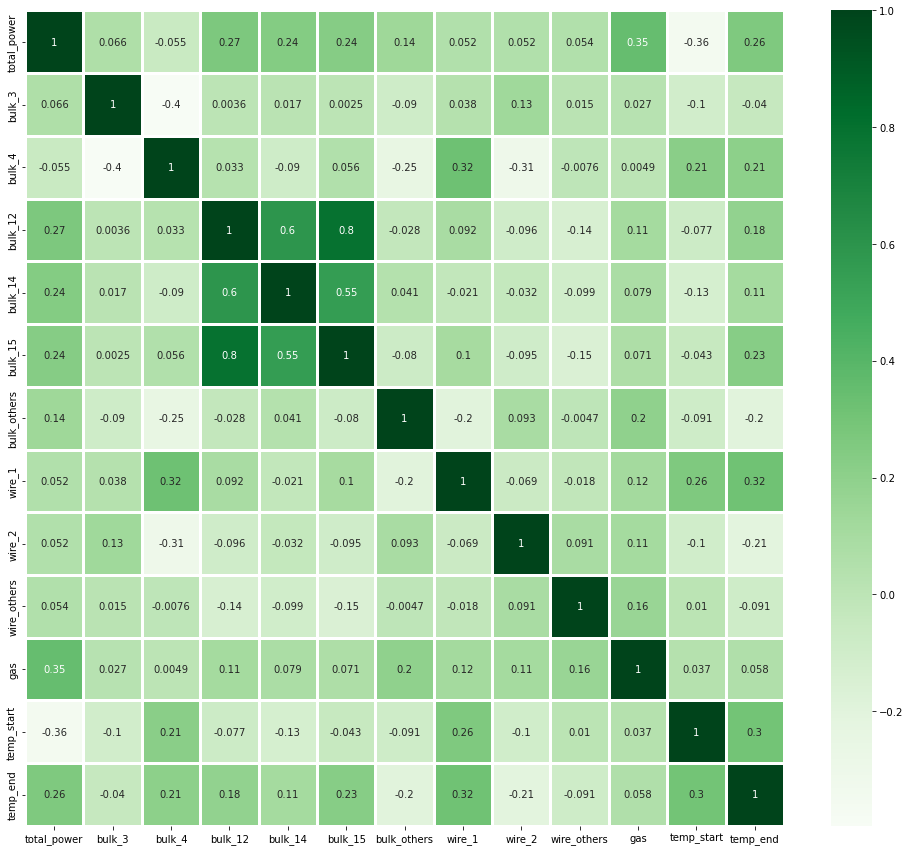

In [66]:
plt.rcParams['figure.figsize'] = (17.0, 15.0)
sns.heatmap(df.corr(), cmap='Greens', annot=True, linewidths=3, linecolor='white')

In general, the dataset has good correlations with a moderate impact on the temp_end target. However, there is a strong relationship between bulk_12 and bulk 15, and a moderate relationship between bulk_12 and bulk_14 and bulk_14 and bulk_15. To do this, we will remove the bulk_12 column, since it has a stronger effect on temp_end.

In [67]:
#remove the bulk_12 column and clear df from indexes
df = df.drop('bulk_12', axis=1)
df = df.reset_index(drop=True)

## Data Analysis

### Preparing data for model training

In [68]:
#set the constants and divide the samples into training and test
random_state = 240423
cv = 5
train, test = train_test_split(df, test_size = 0.25, random_state = random_state)

In [69]:
train

,total_power,bulk_3,bulk_4,bulk_14,bulk_15,bulk_others,wire_1,wire_2,wire_others,gas,temp_start,temp_end
376,612.548975,1,0,1,1,0,181.350006,0.000000,0.000000,14.244007,1598.0,1592.0
363,632.408291,0,0,1,0,0,129.261596,108.515679,279.783508,16.194449,1554.0,1589.0
444,545.075730,0,1,1,1,0,92.149200,0.000000,0.000000,7.093691,1621.0,1595.0
1790,700.813199,1,0,1,1,0,194.244949,0.000000,280.215942,17.335384,1583.0,1577.0
1553,823.876573,0,0,1,1,1,50.122799,155.293831,0.000000,11.595789,1562.0,1576.0
...,...,...,...,...,...,...,...,...,...,...,...,...
637,1089.400004,1,0,1,1,0,137.919601,0.000000,0.000000,22.911746,1629.0,1587.0
1682,1045.474337,0,1,1,1,0,147.607193,0.000000,0.000000,9.106938,1577.0,1605.0
1365,799.826396,0,1,1,0,1,155.095200,0.000000,0.000000,20.018412,1550.0,1585.0
1,481.760005,0,1,1,1,0,96.052315,0.000000,0.000000,12.555561,1581.0,1602.0


In [70]:
#remove gas outlier from train
train = train.drop(train[train['gas'] > 50].index)

In [71]:
x_train = train.drop(['temp_end'], axis = 1)
y_train = train['temp_end']
x_test = test.drop(['temp_end'], axis = 1)
y_test = test['temp_end']

In [72]:
# shape check
x_train.shape, x_test.shape


((1742, 11), (581, 11))

Data ready for modeling

### Model training

#### DecisionTreeRegressor

In [75]:
# Set the random state for the model
random_state = 240423

# Create the Decision Tree model
model_dt = DecisionTreeRegressor(random_state=random_state)

# Create a new pipeline with scaler and trained model
pipeline_dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', model_dt)
])

# Set the grid of hyperparameters to enumerate
param_grid_dt = {
    'model__max_depth': [2, 4, 6, 8, 10, 20, 30],
    'model__min_samples_split': [2, 4, 8, 16, 32, 64]
}

# Run hyperparameter enumeration with cross-validation and MAE estimation
gs_dt_pl = GridSearchCV(
    pipeline_dt,
    param_grid=param_grid_dt,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1
)

In [76]:
# Measure training time with GridSearchCV
start_time = time.time()
gs_dt_pl.fit(x_train, y_train)
training_time_dt = time.time() - start_time

In [79]:
# Get the best model and its MAE on cross-validation
best_tree_model = gs_dt_pl.best_estimator_
best_tree_mae = -gs_dt_pl.best_score_

In [78]:
print(f"Best model: {best_tree_model}")
print(f"MAE on CV: {best_tree_mae:.2f}")

Best model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=6, min_samples_split=32,
                                       random_state=240423))])
MAE on CV: 7.23


#### LinearRegression

In [83]:
# Set the random state for the model
random_state = 240423

# Create the Linear Regression model
model_lr = LinearRegression()

# Create a new pipeline with scaler and trained model
pipeline_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', model_lr)
])

# Set the grid of hyperparameters to enumerate
param_grid_lr = {
    'model__normalize': [True, False],
    'model__fit_intercept': [True, False]
}

# Run hyperparameter enumeration with cross-validation and MAE estimation
gs_lr_pl = GridSearchCV(
    pipeline_lr,
    param_grid=param_grid_lr,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1
)

# Measure training time with GridSearchCV
start_time = time.time()
gs_lr_pl.fit(x_train, y_train)
training_time_lr = time.time() - start_time

# Get the best model and its MAE on cross-validation
best_lr_model = gs_lr_pl.best_estimator_
best_lr_mae = -gs_lr_pl.best_score_

print(f"Best model: {best_lr_model}")
print(f"MAE on CV: {best_lr_mae:.2f}")


Best model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', LinearRegression(normalize=True))])
MAE on CV: 6.70


#### CatBoostRegressor

In [86]:
# Set random_state for CatBoostRegressor
model_cb = CatBoostRegressor(random_seed=42, verbose=True)

# Create a new pipeline with transformer and trained model
pipeline_cb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', model_cb)
])

# Set the grid of hyperparameters to enumerate
param_grid_cb = {
    'model__depth': [2, 4, 6, 8, 10],
    'model__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__iterations': [100, 500, 1000],
}

# Run hyperparameter enumeration with cross-validation and MAE estimation
gs_cb_pl = GridSearchCV(
    pipeline_cb,
    param_grid=param_grid_cb,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1
)

In [87]:
# Measure training time with GridSearchCV
gs_cb_pl.fit(x_train, y_train, model__early_stopping_rounds=10, model__verbose=10)

# Get the best model and its MAE on cross-validation
best_cb_model = gs_cb_pl.best_estimator_
best_cb_mae = -gs_cb_pl.best_score_

print(f"Best model: {best_cb_model}")
print(f"MAE on CV: {best_cb_mae:.2f}")

0:	learn: 11.1856380	total: 146ms	remaining: 2m 25s
10:	learn: 10.9417919	total: 169ms	remaining: 15.2s
20:	learn: 10.7136573	total: 189ms	remaining: 8.82s
30:	learn: 10.5069634	total: 212ms	remaining: 6.63s
40:	learn: 10.3115320	total: 234ms	remaining: 5.47s
50:	learn: 10.1387877	total: 256ms	remaining: 4.77s
60:	learn: 9.9792706	total: 278ms	remaining: 4.28s
70:	learn: 9.8392118	total: 301ms	remaining: 3.94s
80:	learn: 9.7028480	total: 325ms	remaining: 3.68s
90:	learn: 9.5742782	total: 349ms	remaining: 3.48s
100:	learn: 9.4689764	total: 373ms	remaining: 3.32s
110:	learn: 9.3651653	total: 396ms	remaining: 3.17s
120:	learn: 9.2712905	total: 420ms	remaining: 3.05s
130:	learn: 9.1873053	total: 444ms	remaining: 2.94s
140:	learn: 9.1011392	total: 466ms	remaining: 2.84s
150:	learn: 9.0237008	total: 489ms	remaining: 2.75s
160:	learn: 8.9522958	total: 512ms	remaining: 2.67s
170:	learn: 8.8821543	total: 536ms	remaining: 2.6s
180:	learn: 8.8240280	total: 561ms	remaining: 2.54s
190:	learn: 8.768

#### Ridge

In [88]:
# Set random_state for Ridge regression
model_ridge = Ridge(random_state=random_state)

# Create a new pipeline with transformer and trained model
pipeline_ridge = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', model_ridge)])

# Set the grid of hyperparameters to enumerate
param_grid_ridge = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__normalize': [True, False],
    'model__fit_intercept': [True, False]
}

# Run hyperparameter enumeration with cross-validation and MAE estimation
gs_ridge_pl = GridSearchCV(
    pipeline_ridge,
    param_grid=param_grid_ridge,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1
) 

# Measure training time with GridSearchCV
start_time = time.time()
gs_ridge_pl.fit(x_train, y_train)
training_time_ridge = time.time() - start_time 

# Get the best model and its MAE on cross-validation
best_ridge_model = gs_ridge_pl.best_estimator_
best_ridge_mae = -gs_ridge_pl.best_score_ 

print(f"Best model: {best_ridge_model}")
print(f"MAE on CV: {best_ridge_mae:.2f}")


Best model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 Ridge(alpha=1, normalize=False, random_state=240423))])
MAE on CV: 6.69


### Determination of the best model

In [89]:
index = ['DecisionTreeRegressor',
         'LinearRegression',
         'CatBoostRegressor',
         'Ridge']
table = {'MAE':[best_tree_mae, 
                best_lr_mae,
                best_cb_mae,
                best_ridge_mae]}

scores_table = pd.DataFrame(data=table, index=index)

scores_table

,MAE
DecisionTreeRegressor,7.230893
LinearRegression,6.697192
CatBoostRegressor,6.592641
Ridge,6.694494


Based on the results of considering 4 models, the most accurate is CatBoostRegressor. Compared to other models, it takes longer to train. However, there were no requirements from the customer in this regard. Passing grade - MAE <= 6.8. Therefore, in addition to CatBoostRegressor, LinearRegression and Ridge also fit the requirements.

### Checking the best model on test data

In [90]:
# Train the model on all available training data with the best hyperparameters
best_cb_model.fit(x_train, y_train)

# Make predictions on test data
y_pred = best_cb_model.predict(x_test)

# Evaluate model quality on test data using MAE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE on test set: {test_mae:.2f}")

0:	learn: 11.1856380	total: 1.75ms	remaining: 1.75s
1:	learn: 11.1621967	total: 3.44ms	remaining: 1.72s
2:	learn: 11.1362560	total: 5.28ms	remaining: 1.75s
3:	learn: 11.1108111	total: 7.01ms	remaining: 1.75s
4:	learn: 11.0840410	total: 8.49ms	remaining: 1.69s
5:	learn: 11.0618964	total: 10.1ms	remaining: 1.68s
6:	learn: 11.0349071	total: 11.9ms	remaining: 1.69s
7:	learn: 11.0124068	total: 13.6ms	remaining: 1.69s
8:	learn: 10.9866849	total: 15.3ms	remaining: 1.69s
9:	learn: 10.9635783	total: 17ms	remaining: 1.68s
10:	learn: 10.9417919	total: 18.7ms	remaining: 1.69s
11:	learn: 10.9154388	total: 20.5ms	remaining: 1.69s
12:	learn: 10.8908460	total: 22.7ms	remaining: 1.72s
13:	learn: 10.8710067	total: 24.7ms	remaining: 1.74s
14:	learn: 10.8499703	total: 26.4ms	remaining: 1.74s
15:	learn: 10.8278711	total: 28.3ms	remaining: 1.74s
16:	learn: 10.8045105	total: 30ms	remaining: 1.73s
17:	learn: 10.7827154	total: 31.7ms	remaining: 1.73s
18:	learn: 10.7593185	total: 33.3ms	remaining: 1.72s
19:	lea

223:	learn: 8.6002512	total: 338ms	remaining: 1.17s
224:	learn: 8.5954276	total: 339ms	remaining: 1.17s
225:	learn: 8.5900220	total: 341ms	remaining: 1.17s
226:	learn: 8.5847812	total: 342ms	remaining: 1.16s
227:	learn: 8.5808239	total: 344ms	remaining: 1.16s
228:	learn: 8.5766147	total: 345ms	remaining: 1.16s
229:	learn: 8.5734300	total: 347ms	remaining: 1.16s
230:	learn: 8.5691889	total: 348ms	remaining: 1.16s
231:	learn: 8.5664407	total: 350ms	remaining: 1.16s
232:	learn: 8.5616844	total: 351ms	remaining: 1.16s
233:	learn: 8.5573948	total: 353ms	remaining: 1.15s
234:	learn: 8.5531763	total: 354ms	remaining: 1.15s
235:	learn: 8.5491420	total: 355ms	remaining: 1.15s
236:	learn: 8.5451806	total: 357ms	remaining: 1.15s
237:	learn: 8.5418934	total: 358ms	remaining: 1.15s
238:	learn: 8.5381954	total: 360ms	remaining: 1.15s
239:	learn: 8.5346903	total: 362ms	remaining: 1.15s
240:	learn: 8.5298573	total: 363ms	remaining: 1.14s
241:	learn: 8.5260536	total: 365ms	remaining: 1.14s
242:	learn: 

450:	learn: 7.9684934	total: 680ms	remaining: 827ms
451:	learn: 7.9664145	total: 682ms	remaining: 826ms
452:	learn: 7.9651313	total: 683ms	remaining: 825ms
453:	learn: 7.9639292	total: 685ms	remaining: 823ms
454:	learn: 7.9621946	total: 686ms	remaining: 822ms
455:	learn: 7.9599505	total: 688ms	remaining: 820ms
456:	learn: 7.9573369	total: 689ms	remaining: 819ms
457:	learn: 7.9546598	total: 690ms	remaining: 817ms
458:	learn: 7.9527448	total: 692ms	remaining: 816ms
459:	learn: 7.9514122	total: 693ms	remaining: 814ms
460:	learn: 7.9494974	total: 695ms	remaining: 813ms
461:	learn: 7.9473695	total: 697ms	remaining: 811ms
462:	learn: 7.9455981	total: 698ms	remaining: 810ms
463:	learn: 7.9442308	total: 700ms	remaining: 809ms
464:	learn: 7.9422607	total: 702ms	remaining: 807ms
465:	learn: 7.9407321	total: 703ms	remaining: 806ms
466:	learn: 7.9391298	total: 705ms	remaining: 804ms
467:	learn: 7.9375125	total: 706ms	remaining: 803ms
468:	learn: 7.9358636	total: 708ms	remaining: 801ms
469:	learn: 

669:	learn: 7.6441705	total: 1.03s	remaining: 506ms
670:	learn: 7.6431672	total: 1.03s	remaining: 505ms
671:	learn: 7.6421274	total: 1.03s	remaining: 504ms
672:	learn: 7.6410597	total: 1.03s	remaining: 502ms
673:	learn: 7.6399392	total: 1.03s	remaining: 501ms
674:	learn: 7.6385593	total: 1.04s	remaining: 499ms
675:	learn: 7.6377016	total: 1.04s	remaining: 498ms
676:	learn: 7.6367822	total: 1.04s	remaining: 496ms
677:	learn: 7.6351588	total: 1.04s	remaining: 495ms
678:	learn: 7.6339246	total: 1.04s	remaining: 494ms
679:	learn: 7.6330284	total: 1.05s	remaining: 492ms
680:	learn: 7.6322057	total: 1.05s	remaining: 491ms
681:	learn: 7.6307282	total: 1.05s	remaining: 489ms
682:	learn: 7.6298577	total: 1.05s	remaining: 488ms
683:	learn: 7.6284745	total: 1.05s	remaining: 486ms
684:	learn: 7.6271209	total: 1.05s	remaining: 485ms
685:	learn: 7.6254819	total: 1.06s	remaining: 484ms
686:	learn: 7.6238857	total: 1.06s	remaining: 483ms
687:	learn: 7.6224687	total: 1.06s	remaining: 481ms
688:	learn: 

852:	learn: 7.4348632	total: 1.36s	remaining: 234ms
853:	learn: 7.4340456	total: 1.36s	remaining: 233ms
854:	learn: 7.4331707	total: 1.36s	remaining: 231ms
855:	learn: 7.4325447	total: 1.36s	remaining: 230ms
856:	learn: 7.4320131	total: 1.37s	remaining: 228ms
857:	learn: 7.4307512	total: 1.37s	remaining: 227ms
858:	learn: 7.4294652	total: 1.37s	remaining: 225ms
859:	learn: 7.4286217	total: 1.37s	remaining: 224ms
860:	learn: 7.4273675	total: 1.38s	remaining: 222ms
861:	learn: 7.4260598	total: 1.38s	remaining: 221ms
862:	learn: 7.4256023	total: 1.38s	remaining: 219ms
863:	learn: 7.4249341	total: 1.38s	remaining: 217ms
864:	learn: 7.4240115	total: 1.38s	remaining: 216ms
865:	learn: 7.4235648	total: 1.39s	remaining: 214ms
866:	learn: 7.4231123	total: 1.39s	remaining: 213ms
867:	learn: 7.4227228	total: 1.39s	remaining: 211ms
868:	learn: 7.4219798	total: 1.39s	remaining: 210ms
869:	learn: 7.4208664	total: 1.39s	remaining: 208ms
870:	learn: 7.4192875	total: 1.4s	remaining: 207ms
871:	learn: 7

MAE on test data also shows a good result.

In [91]:
# Train DummyRegressor on training data
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(x_train, y_train)

# Get DummyRegressor predictions on test data
dummy_preds = dummy_model.predict(x_test)

# Get predictions of the best model on test data
best_model_preds = best_cb_model.predict(x_test)

# Compute MAE for DummyRegressor and best model on test data
dummy_mae = mean_absolute_error(y_test, dummy_preds)
best_model_mae = mean_absolute_error(y_test, best_model_preds)

print(f"DummyRegressor MAE on test set: {dummy_mae:.2f}")
print(f"Best model MAE on test set: {best_model_mae:.2f}")

DummyRegressor MAE on test set: 7.98
Best model MAE on test set: 6.63


Comparing the results of DummyRegressor and the best model shows that the best model did a better job of regressing on the test dataset than a simple model that always predicts the mean of the target variable.

This suggests that a better model can be used to predict the target variable on new data.

### Defination of important features

In [95]:
x_df = df.drop(['temp_end'], axis = 1)

In [93]:
# Get an array with feature importances
importances = best_cb_model.named_steps['model'].feature_importances_

# Create a dataframe with feature names and their importance, sorted in descending order of importance
feature_importances_df = pd.DataFrame({'feature': x_df.columns, 'importance': importances}).sort_values('importance', ascending=False)

# Display the 10 most important features
feature_importances_df

,feature,importance
0,total_power,28.444646
10,temp_start,28.235981
6,wire_1,11.180500
7,wire_2,7.260959
5,bulk_others,5.899813
9,gas,5.604562
4,bulk_15,4.353092
8,wire_others,3.394752
2,bulk_4,3.347580
3,bulk_14,1.220080


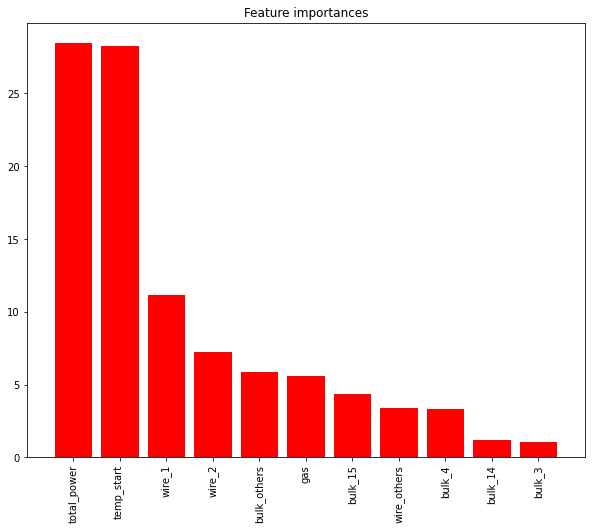

In [94]:
#visualize the importance of features

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
         color="r", align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

On the graph, each bar corresponds to one feature, and its height determines the importance of this feature for the model. The higher the column, the more important the feature.

### Making business recommendations

The customer is offered the CatBoostRegressor model, as the most accurate one, the deviation in degrees is only 6.6.
If an error of a few hundredths of a degree is not critical, then it is possible to choose both LinearRegression and Ridge, which also pass by the declared metric (no more than 6.8).
Recommendations beyond the task:

The most important features that affect the result are the power and temperature of the start of heating:

- There are outliers in the data, practically at all stages of the technological process, they are not large, but the excess of standard values can reach more than 5 times.

An example of such a super-violation can be ladle 1689, where, with the average and median values of the sample in the region of 650, 4536 kW of metal melting power was spent in it. And even if this is considered an outlier, then periodically there are also significant costs of capacities of more than 2000 kW. The number of cycles in a normal distribution is in the range from 3 to 6, however, in some cases, the process can perform up to 16 cycles.

- The melting point of the metal is in the region of 1500 degrees, however, the spread in measurements was clearly exceeded, in almost half of the cases.

If the customer wants to reduce energy costs, this should be taken into account.